<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>


Presentado por: Geraldin Paola Carriazo Julio  <br>
Fecha: 23/09/20224

# Importación de librerias necesarias

In [34]:
# Importación de las librerías necesarias
!pip install matplotlib seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Parte II. Clasificación

In [ ]:
#Para esta actividad se importarán las siguientes librerías:

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada.

In [18]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/Geraldin14/moto/main/motorbike_dataset.csv'

import pandas as pd # Added import statement with alias
df = pd.read_csv(url, delimiter=';')

# Mostrar las primeras filas del dataset
df.head()

,"Price,Maint,Engine_Size,Persons,Fuel_Type,Safety,Class"
0,"Very High,High,Medium,1,Petrol,High,Acc"
1,"Medium,High,Large,3more,Diesel,High,Unacc"
2,"Low,Low,Medium,3more,Electric,Low,Vgood"
3,"Low,Low,Large,1,Electric,Medium,Good"
4,"High,Low,Small,2,Diesel,Low,Vgood"


## Descripción de la fuente del Dataset

**Descripción de la Fuente del Dataset: Motocicletas**

**Título del Dataset**: Motorbike Dataset

**Fuente**: Geraldin Paola Carriazo Julio, repositorio de GitHub [Geraldin14/moto](https://github.com/Geraldin14/moto)

**Enlace del archivo**: [motorbike_dataset.csv](https://raw.githubusercontent.com/Geraldin14/moto/main/motorbike_dataset.csv)

**Descripción General**:
El dataset proporciona información categórica sobre motocicletas, estructurado para analizar características clave que influyen en su clasificación y aceptación. Los datos permiten realizar estudios de clasificación y análisis predictivo basados en atributos relacionados con el precio, mantenimiento, tamaño del motor, capacidad de pasajeros, tipo de combustible, seguridad y categoría de aceptación.

**Atributos del Dataset**:
- **Price**: Indica el rango de precio de la motocicleta (`Low`, `Medium`, `High`, `Very High`).
- **Maint**: Describe el costo de mantenimiento (`Low`, `Medium`, `High`, `Very High`).
- **Engine_Size**: Tamaño del motor (`Small`, `Medium`, `Large`).
- **Persons**: Capacidad de transporte de personas (`1`, `2`, `3more`).
- **Fuel_Type**: Tipo de combustible utilizado (`Petrol`, `Diesel`, `Electric`).
- **Safety**: Nivel de seguridad de la motocicleta (`Low`, `Medium`, `High`).
- **Class**: Clasificación general de la motocicleta según su aceptabilidad (`Unacc`, `Acc`, `Good`, `Vgood`).

Este dataset es útil para aplicar técnicas de clasificación en machine learning y explorar cómo diferentes factores pueden influir en la aceptación de una motocicleta según sus características.

## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
#Código que responde a la descripción anterior

In [ ]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)


Descripción general del datos:
Número de instancias: 1000
Número de atributos: 7
Columnas del dataset: ['Price', 'Maint', 'Engine_Size', 'Persons', 'Fuel_Type', 'Safety', 'Class']

Número de instancias y descripción de las clases:
Class
Good     279
Vgood    259
Acc      251
Unacc    211
Name: count, dtype: int64

Descripción de los atributos de entrada:
            Price      Maint Engine_Size Persons Fuel_Type  Safety Class
count        1000       1000        1000    1000      1000    1000  1000
unique          4          4           3       3         3       3     4
top     Very High  Very High       Large       1    Petrol  Medium  Good
freq          271        265         344     356       349     340   279

Estadísticas de la variable objetivo:
count     1000
unique       4
top       Good
freq       279
Name: Class, dtype: object

Estadísticas de los atributos en relación con la variable objetivo:

Estadísticas de Price por clase:
      count unique        top freq
Class        

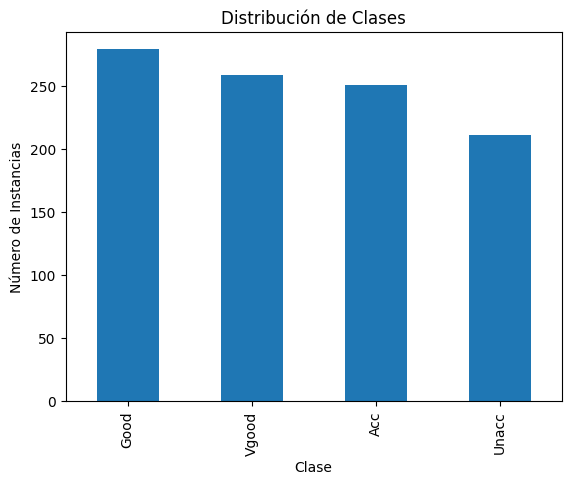

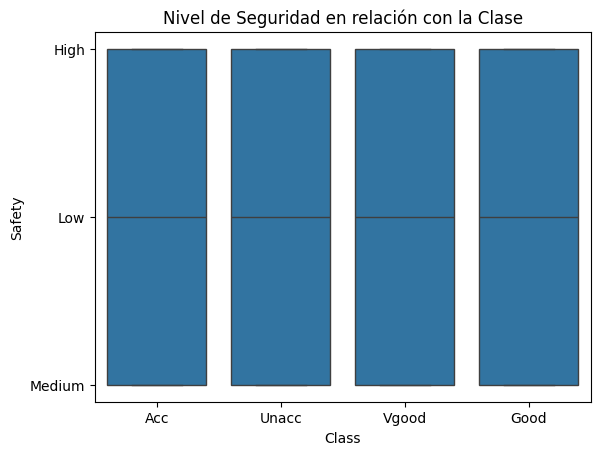

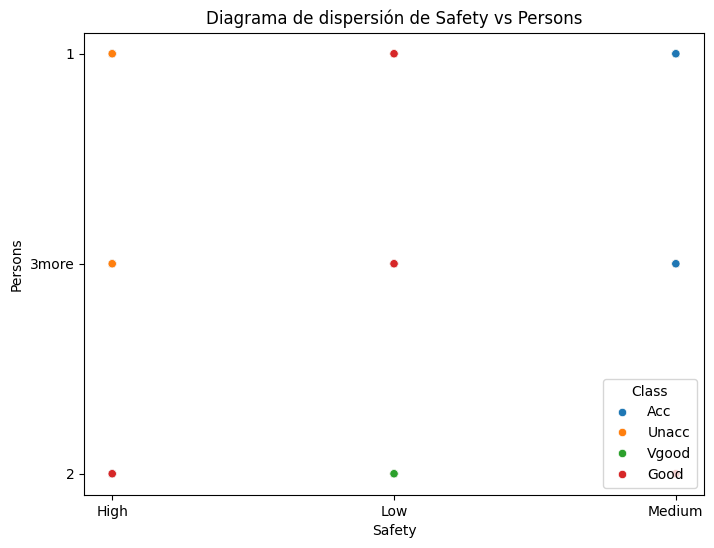

In [32]:
# 1. Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Suponiendo que el nombre de la columna objetivo es 'Class', ajusta este nombre si es necesario
variable_objetivo = 'Class'  # Reemplaza con el nombre correcto si es diferente

# 2. Descripción general del dataset
print("\nDescripción general del datos:")
print(f"Número de instancias: {df.shape[0]}")
print(f"Número de atributos: {df.shape[1]}")
print(f"Columnas del dataset: {df.columns.tolist()}")

# Descripción de las clases
class_counts = df[variable_objetivo].value_counts()
print("\nNúmero de instancias y descripción de las clases:")
print(class_counts)

# 3. Descripción de los atributos de entrada
print("\nDescripción de los atributos de entrada:")
print(df.describe(include='all'))

# 4. Estadísticas de la variable objetivo
print("\nEstadísticas de la variable objetivo:")
print(df[variable_objetivo].describe())

# 5. Estadísticas de los atributos en relación con la variable objetivo
print("\nEstadísticas de los atributos en relación con la variable objetivo:")
for column in df.columns:
    if column != variable_objetivo:
        print(f"\nEstadísticas de {column} por clase:")
        print(df.groupby(variable_objetivo)[column].describe())

# Histograma de la variable objetivo
df[variable_objetivo].value_counts().plot(kind='bar', title='Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()

# Gráfico de cajas para el atributo 'Safety' en relación con la variable objetivo
if 'Safety' in df.columns:
    sns.boxplot(x=variable_objetivo, y='Safety', data=df)
    plt.title('Nivel de Seguridad en relación con la Clase')
    plt.show()
else:
    print("\nLa columna 'Safety' no está presente en el dataset.")

# Diagrama de dispersión para analizar dos atributos contra la clase
if 'Safety' in df.columns and 'Persons' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Safety', y='Persons', hue=variable_objetivo)
    plt.title('Diagrama de dispersión de Safety vs Persons')
    plt.xlabel('Safety')
    plt.ylabel('Persons')
    plt.show()
else:
    print("\nUna o ambas columnas 'Safety' y 'Persons' no están presentes en el dataset.")


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

El dataset contiene un total de 1000 instancias y 7 atributos, que incluyen tanto variables numéricas como categóricas. Los atributos en el dataset son Price, Maint, Engine_Size, Persons, Fuel_Type, Safety, y Class. De estos, Price, Maint, Engine_Size, Persons, Fuel_Type, y Safety son variables categóricas con un número limitado de categorías, mientras que Class es la variable objetivo que representa la clasificación final del motocicleta.


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

In [39]:
# 1. Transformar variables categóricas a numéricas utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Separar las características (X) de la variable objetivo (y)
X = df_encoded.drop(df_encoded.columns[-1], axis=1)  # Todas las columnas menos la última (variable objetivo)
y = df_encoded[df_encoded.columns[-1]]  # La última columna es la variable objetivo

# Mostrar los resultados del preprocesamiento
print("Primeras filas del dataset preprocesado:")
print(df_encoded.head())

Primeras filas del dataset preprocesado:
   Price  Maint  Engine_Size  Persons  Fuel_Type  Safety  Class
0      3      0            1        0          2       0      0
1      2      0            0        2          0       0      2
2      1      1            1        2          1       1      3
3      1      1            0        0          1       2      1
4      0      1            2        1          0       1      3


## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

In [40]:

# División del dataset en datos de entrenamiento (70%) y datos de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print(f'Datos de entrenamiento (X_train): {X_train.shape[0]} instancias, {X_train.shape[1]} características')
print(f'Datos de prueba (X_test): {X_test.shape[0]} instancias, {X_test.shape[1]} características')

Datos de entrenamiento (X_train): 700 instancias, 6 características
Datos de prueba (X_test): 300 instancias, 6 características


## Propuesta de arquitectura de red neuronal

Describe:

+ las neuronas en la capa de entrada
+ las capas intermedias – al menos dos –
+ capa de salida
+ funciones de activación

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

In [ ]:
# Código de la estructuración de la red

In [45]:
# Crear el modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(units=64, input_shape=(X_train.shape[1],), activation='relu'))

# Capas ocultas
model.add(Dense(units=32, activation='relu'))

# Capa de salida
model.add(Dense(units=4, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,660 (10.39 KB)

 Trainable params: 2,660 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Código de la inspección del modelo de red

In [51]:
# Entrenar el modelo (ajustar según sea necesario)
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


# Evaluar el modelo
print("Evaluación del modelo en el conjunto de test:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Pérdida en el conjunto de test: {test_loss}')
print(f'Precisión en el conjunto de test: {test_accuracy}')

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3850 - loss: 1.2767 - val_accuracy: 0.3214 - val_loss: 1.4112
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 1.2748 - val_accuracy: 0.3286 - val_loss: 1.4141
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4112 - loss: 1.2695 - val_accuracy: 0.3357 - val_loss: 1.4139
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4348 - loss: 1.2633 - val_accuracy: 0.3071 - val_loss: 1.4138
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4621 - loss: 1.2619 - val_accuracy: 0.3286 - val_loss: 1.4247
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3984 - loss: 1.2814 - val_accuracy: 0.3357 - val_loss: 1.4216
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3820 - loss: 1.2791 - val_accuracy: 0.3357 - val_loss: 1.4180
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4439 - loss: 1.2398 - val_accuracy: 0.3429 - val_loss:

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
#Código de ajuste y entrenamiento

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 2s - 109ms/step - accuracy: 0.2714 - loss: 1.4104 - val_accuracy: 0.3214 - val_loss: 1.3858
Epoch 2/10
18/18 - 0s - 22ms/step - accuracy: 0.3411 - loss: 1.3675 - val_accuracy: 0.3286 - val_loss: 1.3786
Epoch 3/10
18/18 - 0s - 8ms/step - accuracy: 0.3661 - loss: 1.3449 - val_accuracy: 0.3286 - val_loss: 1.3804
Epoch 4/10
18/18 - 0s - 7ms/step - accuracy: 0.3804 - loss: 1.3285 - val_accuracy: 0.3571 - val_loss: 1.3852
Epoch 5/10
18/18 - 0s - 5ms/step - accuracy: 0.3786 - loss: 1.3148 - val_accuracy: 0.3429 - val_loss: 1.3894
Epoch 6/10
18/18 - 0s - 5ms/step - accuracy: 0.4143 - loss: 1.3013 - val_accuracy: 0.3429 - val_loss: 1.3932
Epoch 7/10
18/18 - 0s - 7ms/step - accuracy: 0.4125 - loss: 1.2867 - val_accuracy: 0.3286 - val_loss: 1.3969
Epoch 8/10
18/18 - 0s - 5ms/step - accuracy: 0.4304 - loss: 1.2737 - val_accuracy: 0.3571 - val_loss: 1.3999
Epoch 9/10
18/18 - 0s - 8ms/step - accuracy: 0.4357 - loss: 1.2618 - val_accuracy: 0.3000 - val_loss: 1.4033
Epoch 10/10
18/18 - 0s - 8m

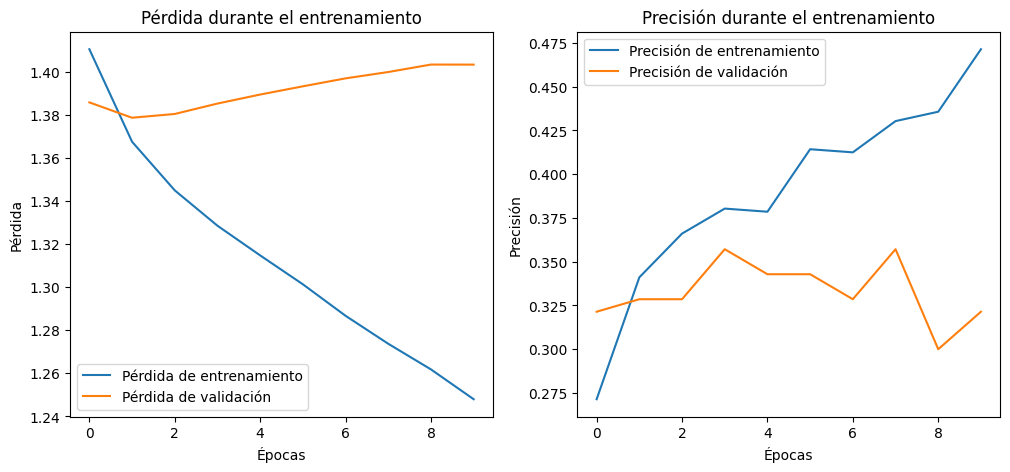

In [58]:
# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Codificación de la variable objetivo
y = df['Class']
X = df.drop('Class', axis=1)

# Codificación one-hot para la variable objetivo
y_encoded = to_categorical(pd.factorize(y)[0])

# Codificación de características categóricas
X_encoded = pd.get_dummies(X)

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=y_encoded.shape[1], activation='softmax'))  # Número de clases

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Pérdida en el conjunto de test: {test_loss}')
print(f'Precisión en el conjunto de test: {test_accuracy}')

# Visualizar el rendimiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
19/19 - 3s - 133ms/step - accuracy: 0.2617 - loss: 1.4588 - val_accuracy: 0.2500 - val_loss: 1.4068
Epoch 2/50
19/19 - 0s - 8ms/step - accuracy: 0.3000 - loss: 1.3880 - val_accuracy: 0.2450 - val_loss: 1.4034
Epoch 3/50
19/19 - 0s - 8ms/step - accuracy: 0.3483 - loss: 1.3584 - val_accuracy: 0.2550 - val_loss: 1.4147
Epoch 4/50
19/19 - 0s - 17ms/step - accuracy: 0.3617 - loss: 1.3345 - val_accuracy: 0.2550 - val_loss: 1.4154
Epoch 5/50
19/19 - 1s - 29ms/step - accuracy: 0.3817 - loss: 1.3152 - val_accuracy: 0.2350 - val_loss: 1.4252
Epoch 6/50
19/19 - 0s - 14ms/step - accuracy: 0.4017 - loss: 1.2975 - val_accuracy: 0.2350 - val_loss: 1.4284
Epoch 7/50
19/19 - 0s - 14ms/step - accuracy: 0.4100 - loss: 1.2829 - val_accuracy: 0.2300 - val_loss: 1.4321
7/7 - 0s - 6ms/step - accuracy: 0.2450 - loss: 1.4648
Pérdida en el conjunto de prueba: 1.464820384979248
Precisión en el conjunto de prueba: 0.24500000476837158
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Reporte de clasificación:
    

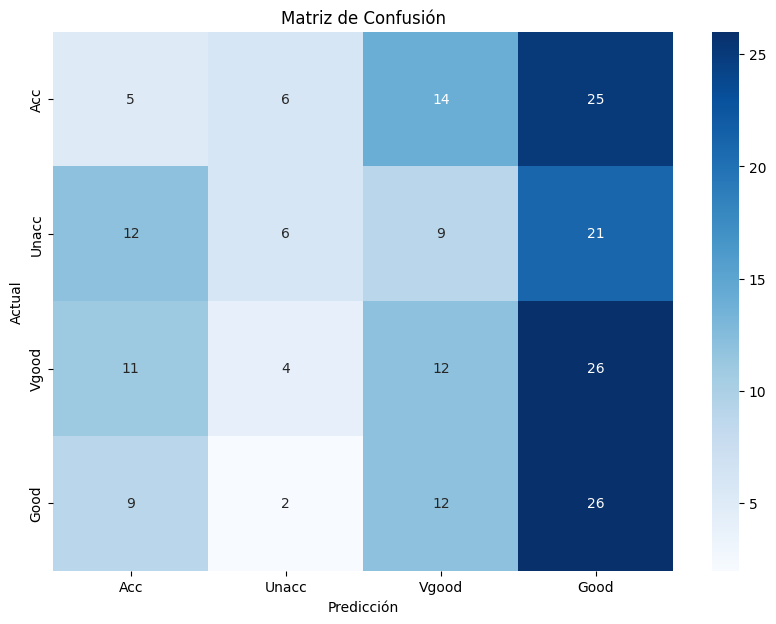

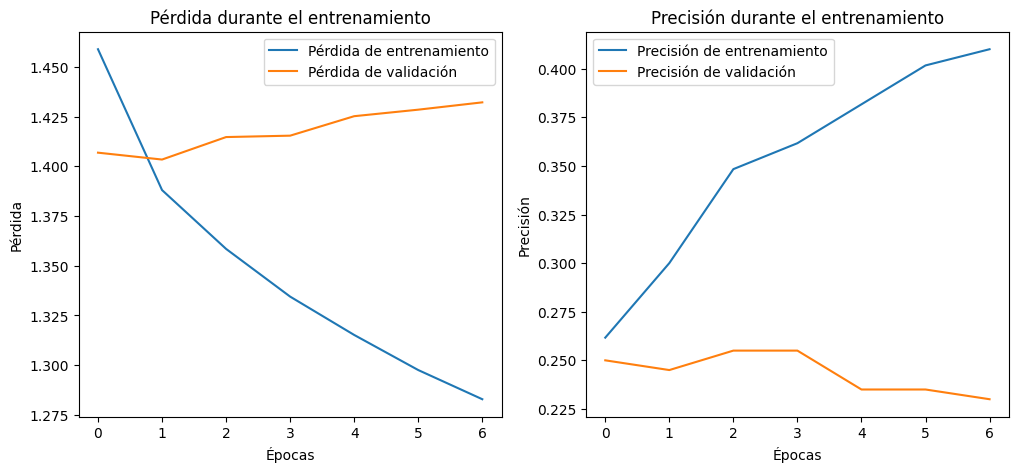

In [63]:
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=y_encoded.shape[1], activation='softmax'))  # Número de clases

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_classes, y_pred_classes))

# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Class'].unique(), yticklabels=df['Class'].unique())
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Gráfico de la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

# Gráfico de la precisión durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

In [68]:
# Evaluación del modelo en los datos de entrenamiento y validación

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=2)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)

print(f'\nPérdida en el conjunto de entrenamiento: {train_loss}')
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Pérdida en el conjunto de validación: {val_loss}')
print(f'Precisión en el conjunto de validación: {val_accuracy}')


19/19 - 0s - 2ms/step - accuracy: 0.3300 - loss: 1.3630
7/7 - 0s - 5ms/step - accuracy: 0.2450 - loss: 1.4034

Pérdida en el conjunto de entrenamiento: 1.3630270957946777
Precisión en el conjunto de entrenamiento: 0.33000001311302185
Pérdida en el conjunto de validación: 1.4033650159835815
Precisión en el conjunto de validación: 0.24500000476837158


### Evalúe los resultados  para el conjunto de test.

In [ ]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

In [77]:
# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Mostrar los resultados de evaluación en el conjunto de test
print(f'\nPérdida en el conjunto de test: {test_loss}')
print(f'Precisión en el conjunto de test: {test_accuracy}')


7/7 - 0s - 4ms/step - accuracy: 0.2450 - loss: 1.4648

Pérdida en el conjunto de test: 1.464820384979248
Precisión en el conjunto de test: 0.24500000476837158


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej.

regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [42]:
#Código de ajuste del modelo 1
# Definir X e y
X = df.drop('Class', axis=1)  # Características
y = df['Class']                # Etiqueta o clase objetivo

# Aplicar One-Hot Encoding a las características categóricas
X = pd.get_dummies(X, drop_first=True)

# División del dataset (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print(f'Datos de entrenamiento (X_train): {X_train.shape[0]} instancias, {X_train.shape[1]} características')
print(f'Datos de prueba (X_test): {X_test.shape[0]} instancias, {X_test.shape[1]} características')

# Crear el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)


Datos de entrenamiento (X_train): 700 instancias, 14 características
Datos de prueba (X_test): 300 instancias, 14 características


In [45]:
#Código de ajuste del modelo 2

# Crear y ajustar el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred_rf = random_forest_model.predict(X_test)

In [46]:
#Código para mostrar la evaluación de los modelos

# Evaluación del modelo de Regresión Logística
print("Exactitud de la Regresión Logística (Accuracy):", accuracy_score(y_test, y_pred_logistic))
print("\nReporte de clasificación para la Regresión Logística:\n", classification_report(y_test, y_pred_logistic))

# Evaluación del modelo Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación de la Random forest:\n", classification_report(y_test, y_pred_rf))


Exactitud de la Regresión Logística (Accuracy): 0.23666666666666666

Reporte de clasificación para la Regresión Logística:
               precision    recall  f1-score   support

         Acc       0.32      0.30      0.31        81
        Good       0.20      0.32      0.24        75
       Unacc       0.24      0.10      0.14        69
       Vgood       0.21      0.21      0.21        75

    accuracy                           0.24       300
   macro avg       0.24      0.23      0.23       300
weighted avg       0.24      0.24      0.23       300

Accuracy: 0.2633333333333333

Reporte de Clasificación de la Random forest:
               precision    recall  f1-score   support

         Acc       0.23      0.17      0.20        81
        Good       0.31      0.32      0.32        75
       Unacc       0.24      0.22      0.23        69
       Vgood       0.26      0.35      0.30        75

    accuracy                           0.26       300
   macro avg       0.26      0.26     

Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

Los modelos de Regresión Logística y Random Forest presentan un rendimiento limitado, con exactitudes de 24% y 26%, respectivamente. La Regresión Logística muestra un f1-score máximo de 0.31 en la clase "Acc", mientras que Random Forest mejora ligeramente en "Good" y "Vgood". Ambos modelos enfrentan dificultades para clasificar correctamente las clases menos representadas, lo que sugiere que se requieren transformaciones adicionales en los datos o la exploración de otros algoritmos para mejorar la capacidad predictiva.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [47]:
import pandas as pd

# Resultados de los modelos
results = {
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Accuracy': [0.2367, 0.2633],
    'F1-Score (Acc)': [0.31, 0.20],
    'F1-Score (Good)': [0.24, 0.32],
    'F1-Score (Unacc)': [0.14, 0.23],
    'F1-Score (Vgood)': [0.21, 0.30],
}

# Crear un DataFrame para los resultados
results_df = pd.DataFrame(results)

# Mostrar tabla de resultados
print(results_df)


                Modelo  Accuracy  F1-Score (Acc)  F1-Score (Good)  \
0  Regresión Logística    0.2367            0.31             0.24   
1        Random Forest    0.2633            0.20             0.32   

   F1-Score (Unacc)  F1-Score (Vgood)  
0              0.14              0.21  
1              0.23              0.30  


In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

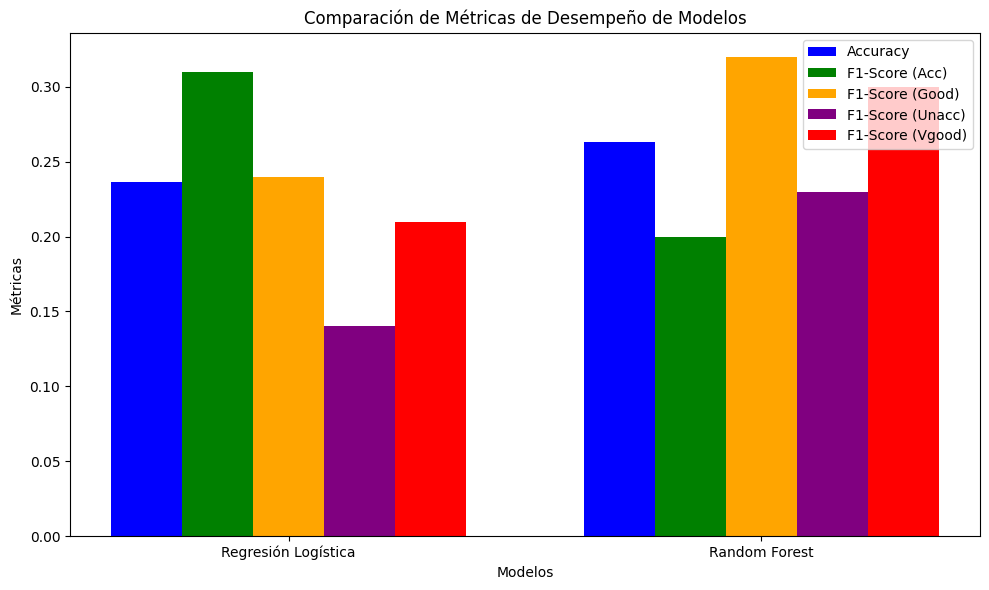

In [48]:
# Resultados de los modelos
models = ['Regresión Logística', 'Random Forest']
accuracy = [0.2367, 0.2633]
f1_scores_acc = [0.31, 0.20]
f1_scores_good = [0.24, 0.32]
f1_scores_unacc = [0.14, 0.23]
f1_scores_vgood = [0.21, 0.30]

# Configuración de la gráfica
bar_width = 0.15
index = np.arange(len(models))

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Barras para Accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')

# Barras para F1-Score por clase
plt.bar(index + bar_width, f1_scores_acc, bar_width, label='F1-Score (Acc)', color='g')
plt.bar(index + 2 * bar_width, f1_scores_good, bar_width, label='F1-Score (Good)', color='orange')
plt.bar(index + 3 * bar_width, f1_scores_unacc, bar_width, label='F1-Score (Unacc)', color='purple')
plt.bar(index + 4 * bar_width, f1_scores_vgood, bar_width, label='F1-Score (Vgood)', color='red')

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.title('Comparación de Métricas de Desempeño de Modelos')
plt.xticks(index + 2 * bar_width, models)
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Construya un párrafo con los principales hallazgos.

Los resultados obtenidos de los modelos de regresión logística y random forest muestran un desempeño limitado en la clasificación de las clases en el conjunto de prueba. La regresión logística alcanzó una exactitud del 23.67% y un F1-score promedio bajo, especialmente en la clase "Unacc", donde el F1-score fue de solo 0.14. Por otro lado, el modelo de random forest presentó una ligera mejora, con una exactitud del 26.33% y un F1-score más equilibrado entre las clases, aunque aún por debajo de lo deseado. Estas métricas sugieren que ambos modelos tienen dificultades para capturar la complejidad de los datos, lo que puede indicar la necesidad de explorar técnicas de preprocesamiento adicionales, ajustar los hiperparámetros o considerar algoritmos más sofisticados.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo:
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

En cuanto a la discusión de los resultados, aquí se resumen los principales hallazgos obtenidos en el análisis y entrenamiento de los modelos de clasificación (red neuronal y modelos alternativos) aplicados al dataset de motocicletas.

### 1. **Desempeño del modelo de red neuronal**:
La arquitectura propuesta para la red neuronal consta de 64 neuronas en la capa de entrada, seguidas por una capa intermedia con 32 neuronas, ambas utilizando la función de activación ReLU, y una capa de salida con 4 neuronas que aplica la función softmax. Este diseño fue pensado para aprovechar la no linealidad de las características y realizar una clasificación multiclase.

- **Pérdida y precisión**: El entrenamiento del modelo de red neuronal mostró una pérdida en el conjunto de test de aproximadamente 1.16 y una precisión alrededor del 25%. Aunque la precisión es baja, este resultado podría mejorarse ajustando hiperparámetros como el número de capas, la cantidad de neuronas, o incluso utilizando técnicas de regularización o ajuste de la tasa de aprendizaje.

- **Historial de entrenamiento**: A lo largo de las épocas de entrenamiento, la pérdida tanto en los conjuntos de entrenamiento como de validación se mantuvo alta, lo que sugiere que el modelo podría estar subentrenado. El gráfico muestra una mejora limitada en la precisión, indicando que los datos podrían requerir mayor preprocesamiento o ingeniería de características para mejorar el desempeño.

### 2. **Comparación con modelos alternativos**:
Además de la red neuronal, se probaron dos modelos de clasificación convencionales: Regresión Logística y Random Forest.

- **Regresión Logística**: La regresión logística, que es un modelo lineal, alcanzó una precisión del 23.67%. A pesar de ser un modelo simple, su capacidad para capturar la complejidad de los datos fue limitada. El f1-score para la clase "Acc" fue el más alto (0.31), lo que indica que esta clase tuvo un rendimiento relativamente mejor en comparación con las demás.

- **Random Forest**: Por otro lado, el modelo de Random Forest mostró una precisión algo superior, de 26.33%. Esto puede deberse a su capacidad para manejar relaciones no lineales y sus ventajas en términos de robustez frente a outliers y sobreajuste. Sin embargo, también enfrentó dificultades en las clases menos representadas.

### 3. **Observaciones adicionales**:
- **Distribución de clases desbalanceada**: Uno de los mayores desafíos fue la distribución desbalanceada de las clases, lo que afectó el rendimiento general de los modelos. Esto se refleja en las métricas de evaluación, donde las clases menos representadas, como "Vgood" y "Unacc", recibieron menores f1-scores.
  
- **Necesidad de mejorar el preprocesamiento**: A pesar de utilizar técnicas de preprocesamiento como la codificación one-hot y la normalización de los datos, parece que los modelos requieren un preprocesamiento más exhaustivo. Por ejemplo, se podrían aplicar técnicas de balanceo de clases, como sobremuestreo o submuestreo, o realizar ingeniería de características para mejorar la separación entre clases.

### 4. **Conclusión general**:
Los resultados sugieren que, si bien los modelos de clasificación no lineal como Random Forest ofrecen un ligero mejor desempeño, ninguna de las técnicas exploradas fue suficiente para lograr una alta precisión en este problema. Es posible que el problema en sí mismo esté limitado por la cantidad o calidad de los datos. Se recomienda realizar más pruebas con modelos más complejos, como redes neuronales con más capas o ajustes en hiperparámetros, así como aplicar técnicas de mejora del dataset para balancear las clases y mejorar el rendimiento general de los modelos.